## Importación de las librerías a usar

In [29]:
# Generación del alfabeto inglés
import string
alphabet = list(string.ascii_uppercase)
alphabet = ['!'] + alphabet

# Análisis exploratorio y estructura de la información
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from itertools import product

# Métricas de error y metodología de validación
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, train_test_split

# Para embellecer las gráficas
sns.set()


import tensorflow as tf

%matplotlib inline
%load_ext tensorboard

# from sklearn.datasets import *
# from local.lib import mlutils
# tf.__version__
import pandas as pd
import gdown



# Lectura y exploración del dataset

## Dataset para entrenamiento

In [30]:
df_train = gdown.download('https://drive.google.com/uc?id=1j9wYmC-gjh2p7o4skayM1tgPFo2lzZb9', 'data.csv', quiet=False); df_train = pd.read_csv('data.csv')


Downloading...
From: https://drive.google.com/uc?id=1j9wYmC-gjh2p7o4skayM1tgPFo2lzZb9
To: /content/data.csv
100%|██████████| 39.1M/39.1M [00:00<00:00, 163MB/s]


In [31]:
df_train.empty

False

In [32]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [33]:
np.array(X_train.iloc[1000]).reshape(28,28)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,   7,   1, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254, 254, 208, 254, 254, 254, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 254,  46, 255, 253, 254,   1, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 254, 255, 255,   1,   0, 255, 118, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
          0, 255,   1, 253, 255,   1, 255, 254, 255, 255, 255, 255, 255,
        255, 255],
       [25

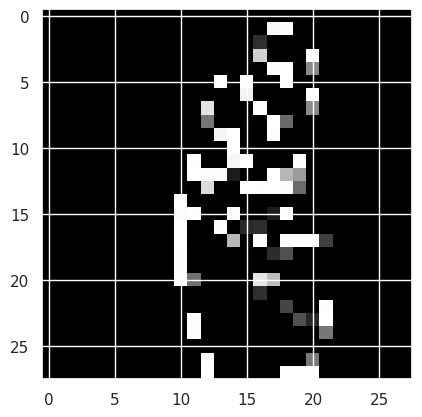

In [34]:
plt.imshow(np.array(X_train.iloc[1000]).reshape((28,28)), cmap="binary")
plt.show()


## Dataset para test

In [35]:
df_test = gdown.download('https://drive.google.com/uc?id=1sPxsIUC4FlxiOaF7jcDc19L-cSsl9Ul9', 'data.csv', quiet=False); df_train = pd.read_csv('data.csv')
df_test = pd.read_csv('data.csv')

# Check for NaN values in the 'label' column in the test dataset
print("Number of NaN values in 'label' column in df_test before dropping:", df_test.label.isna().sum())

# Drop rows where the 'label' is NaN specifically from the test dataframe
df_test.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0 if any were dropped)
print("Number of NaN values in 'label' column in df_test after dropping:", df_test.label.isna().sum())

# Convert the 'label' column to integer type after dropping NaNs
df_test['label'] = df_test['label'].astype(int)

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

Downloading...
From: https://drive.google.com/uc?id=1sPxsIUC4FlxiOaF7jcDc19L-cSsl9Ul9
To: /content/data.csv
100%|██████████| 13.0M/13.0M [00:00<00:00, 120MB/s]


Number of NaN values in 'label' column in df_test before dropping: 0
Number of NaN values in 'label' column in df_test after dropping: 0


In [36]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

## Análisis de los dataset unidos

In [37]:
df = pd.concat([df_train, df_test])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,253,255,255,255,...,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4263,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4264,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4265,255,255,255,252,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26


In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
# Check for NaN values in the 'label' column after concatenation
print("Number of NaN values in 'label' column before dropping:", df.label.isna().sum())

# Drop rows where the 'label' is NaN
df.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0)
print("Number of NaN values in 'label' column after dropping:", df.label.isna().sum())

# Now attempt the conversion to int and apply the lambda function
df.label.astype(int).apply(lambda index_letter: alphabet[ index_letter ])

Number of NaN values in 'label' column before dropping: 0
Number of NaN values in 'label' column after dropping: 0


,label
0,!
1,!
2,!
3,!
4,!
...,...
8529,Z
8530,Z
8531,Z
8532,Z


In [40]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

ñ = 14

Number of NaN values in 'label' column before dropping: 0
Number of NaN values in 'label' column after dropping: 0


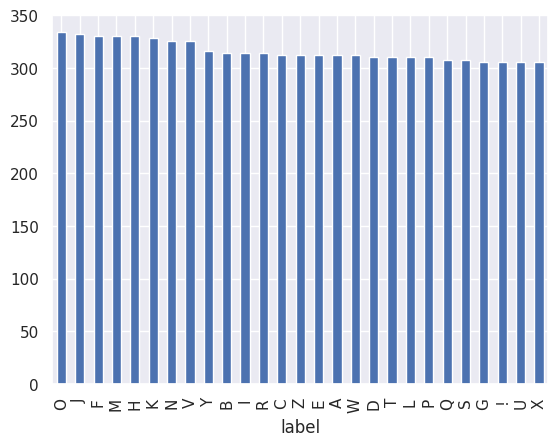

In [41]:
# Check for NaN values in the 'label' column after concatenation
print("Number of NaN values in 'label' column before dropping:", df.label.isna().sum())

# Drop rows where the 'label' is NaN
df.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0)
print("Number of NaN values in 'label' column after dropping:", df.label.isna().sum())

# Convert the 'label' column to integer type before applying the lambda function
df['label'] = df['label'].astype(int)

# Now attempt the conversion to int and apply the lambda function
df.label.apply(lambda index_letter: alphabet[ index_letter ])

# Calculate and plot value counts as originally intended
counts = df.label.apply(lambda index_letter: alphabet[ index_letter ]).value_counts()
counts.plot(kind='bar')
plt.show()

In [42]:
np.unique(df.label.apply(lambda index_letter: alphabet[ index_letter ]))

array(['!', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
       'Z'], dtype=object)

Se está trabajando un dataset que por defecto ya viene partido en dos conjuntos: Train y Test.
La cantidad de muestras que hay en el conjunto de entrenamiento es de 12844 y en el de test hay 4267.
La última columna (`label`) corresponde a las diferentes clases que tiene este problema de clasificación.

**NO TIENE DATOS FALTANTES**

In [43]:
k = df.isna().sum()
((round(k/df.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k))], sep='%')

,0
pixel_0,0%
pixel_1,0%
pixel_2,0%
pixel_3,0%
pixel_4,0%
...,...
pixel_780,0%
pixel_781,0%
pixel_782,0%
pixel_783,0%


Se escalan los conjuntos $X_{train}$ y $X_{test}$ con `MinMaxScaler` en base a $X_{train}$